In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,mean_squared_error, r2_score,mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from xgboost import XGBRegressor
from xgboost import XGBClassifier


In [25]:
data=pd.read_csv(r"C:\Users\HP\Downloads\GITHUB\codestorm_hackathon\data\master_nigerian_farmer_data.csv")

In [251]:
data.head()

,farmer_id,age,gender,education_category,education_level_years,marital_status,household_size,state,region,has_off_farm_income,...,requests_loan_now,loan_amount_requested_ngn,current_loan_purpose,current_loan_tenure_months,credit_score,creditworthiness_category,max_recommended_loan_ngn,suitable_loan_products,predicted_default_probability_current_loan,predicted_loan_repayment_outcome
0,NGF000001,56,Male,Secondary Incomplete,9,Married,5,Benue,North Central,False,...,True,260000.0,Asset Acquisition,24,645,Good,646000.0,"Input Finance, Microfinance Starter, Working C...",0.0919,Likely Full Repayment
1,NGF000002,54,Male,Primary Complete,6,Married,10,Nasarawa,North Central,True,...,True,1575000.0,Bundled Services Loan,12,581,Fair,2091000.0,"Crop Insurance Partnership, Digital Finance So...",0.1141,Likely Full Repayment
2,NGF000003,62,Male,Primary Complete,6,Married,4,Katsina,North West,False,...,True,65000.0,Input Loan,9,585,Fair,258000.0,"Crop Insurance Partnership, Digital Finance So...",0.1002,Likely Full Repayment
3,NGF000004,58,Male,Primary Complete,6,Married,12,FCT,North Central,False,...,False,0.0,NaN,0,523,Poor,627000.0,"Digital Finance Solutions, Microfinance Starter",0.0000,NaN
4,NGF000005,53,Male,Secondary Complete,12,Married,3,Sokoto,North West,True,...,True,175000.0,Asset Acquisition,18,666,Very Good,392000.0,"Digital Finance Solutions, Input Finance, Land...",0.0991,Likely Full Repayment


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 85 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   farmer_id                                   10000 non-null  object 
 1   age                                         10000 non-null  int64  
 2   gender                                      10000 non-null  object 
 3   education_category                          10000 non-null  object 
 4   education_level_years                       10000 non-null  int64  
 5   marital_status                              10000 non-null  object 
 6   household_size                              10000 non-null  int64  
 7   state                                       10000 non-null  object 
 8   region                                      10000 non-null  object 
 9   has_off_farm_income                         10000 non-null  bool   
 10  annual_off_

In [255]:
data.shape

(10000, 85)

In [126]:
X = data.drop("credit_score", axis=1) 

y = data["credit_score"]


# Feature Selection with Scaling and Chi-Squared Test

### Step 1: Scale `X_encoded` to non-negative values using `MinMaxScaler`
We use the `MinMaxScaler` to scale the features of `X_encoded` into the range of 0 to 1.




In [152]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_encoded)
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X_encoded.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['has_off_farm_income', 'has_land_title', 'has_weather_insurance', 'smartphone_owner', 'mobile_money_activity_score_1_10', 'cooperative_member', 'cooperative_repayment_rate_percent', 'has_prior_loan', 'prior_loan_repayment_rate', 'creditworthiness_category']


# Feature Importance using Random Forest


In [181]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

# Sort features by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(20))  

#  select top N features (e.g., top 20 features)
top_n_features = feature_importance_df.head(20)['Feature']
X_selected = X_encoded[top_n_features]



                            Feature  Importance
40       monthly_mobile_spend_naira    0.033825
25           post_harvest_loss_perc    0.033637
53            distance_to_market_km    0.032730
54              distance_to_bank_km    0.032673
26      percentage_sold_unprocessed    0.031806
27              percentage_consumed    0.031137
23            income_per_capita_ngn    0.029360
20         annual_farm_expenses_ngn    0.029262
16    annual_farm_yield_tons_per_ha    0.029176
0                               age    0.029039
10                     farm_size_ha    0.028592
9          farming_experience_years    0.028528
62         max_recommended_loan_ngn    0.028423
17            total_production_tons    0.027864
22          total_annual_income_ngn    0.026787
21                  farm_profit_ngn    0.026684
19          annual_farm_revenue_ngn    0.025873
5                    household_size    0.023891
43     digital_footprint_score_1_10    0.022513
44  utility_bill_payment_score_1_10    0

In [353]:
data1=data[[
    'monthly_mobile_spend_naira',
    'post_harvest_loss_perc',
    'distance_to_market_km',
    'distance_to_bank_km',
    'percentage_sold_unprocessed',
    'percentage_consumed',
    'income_per_capita_ngn',
    'annual_farm_revenue_ngn',
    'annual_farm_yield_tons_per_ha',
    'farm_size_ha',
    'farming_experience_years',
    'age',
    'education_category',
    'primary_crop',
    'mobile_money_usage_frequency',
    'creditworthiness_category',
    'mobile_money_activity_score_1_10',
    'cooperative_repayment_rate_percent',
    'prior_loan_repayment_rate',
    'has_off_farm_income',
    'credit_score',
    'gender',
    'has_land_title',
    'has_weather_insurance',
    'smartphone_owner',
    'cooperative_member',
    'has_prior_loan',
    'household_size'
]]

In [355]:
data1.shape

(10000, 28)

In [ ]:
data1.to_csv(r"C:\Users\HP\Downloads\GITHUB\codestorm_hackathon\data\filtered_data.csv", index=False)


In [206]:
data['farming_experience_years'].describe()

count    10000.000000
mean        15.936400
std         11.087662
min          1.000000
25%          7.000000
50%         14.000000
75%         24.000000
max         45.000000
Name: farming_experience_years, dtype: float64

In [113]:
data['has_prior_loan'].value_counts()

has_prior_loan
False    7479
True     2521
Name: count, dtype: int64

In [6]:
data2=pd.read_csv(r"C:\Users\HP\Downloads\GITHUB\codestorm_hackathon\data\filtered_data.csv")

In [9]:
data2.head()

,monthly_mobile_spend_naira,post_harvest_loss_perc,distance_to_market_km,distance_to_bank_km,percentage_sold_unprocessed,percentage_consumed,income_per_capita_ngn,annual_farm_revenue_ngn,annual_farm_yield_tons_per_ha,farm_size_ha,...,prior_loan_repayment_rate,has_off_farm_income,credit_score,gender,has_land_title,has_weather_insurance,smartphone_owner,cooperative_member,has_prior_loan,household_size
0,261,35.35,54.2,98.5,26.7,35.3,184800.0,924000.0,24.85,0.31,...,0.00,False,645,Male,False,False,False,True,False,5
1,1198,13.51,18.0,87.5,23.1,34.1,708200.0,6978000.0,14.24,1.75,...,0.00,True,581,Male,False,False,True,False,False,10
2,3766,40.15,17.7,7.3,7.2,15.3,231250.0,925000.0,2.41,2.02,...,0.00,False,585,Male,False,False,True,False,False,4
3,2236,37.02,20.3,107.5,28.7,9.9,296917.0,3563000.0,4.12,2.47,...,0.49,False,523,Male,False,False,True,True,True,12
4,3159,42.39,65.3,24.5,7.7,16.4,206667.0,226000.0,2.90,0.41,...,0.00,True,666,Male,False,False,True,False,False,3


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   monthly_mobile_spend_naira          10000 non-null  int64  
 1   post_harvest_loss_perc              10000 non-null  float64
 2   distance_to_market_km               10000 non-null  float64
 3   distance_to_bank_km                 10000 non-null  float64
 4   percentage_sold_unprocessed         10000 non-null  float64
 5   percentage_consumed                 10000 non-null  float64
 6   income_per_capita_ngn               10000 non-null  float64
 7   annual_farm_revenue_ngn             10000 non-null  float64
 8   annual_farm_yield_tons_per_ha       10000 non-null  float64
 9   farm_size_ha                        10000 non-null  float64
 10  farming_experience_years            10000 non-null  int64  
 11  age                                 10000 

In [13]:
data2.duplicated().sum()


0

In [27]:
data2['credit_score'].describe()

count    10000.00000
mean       606.85420
std         65.55391
min        378.00000
25%        564.00000
50%        606.00000
75%        650.00000
max        850.00000
Name: credit_score, dtype: float64

# Random Forest Regressor for credit_score

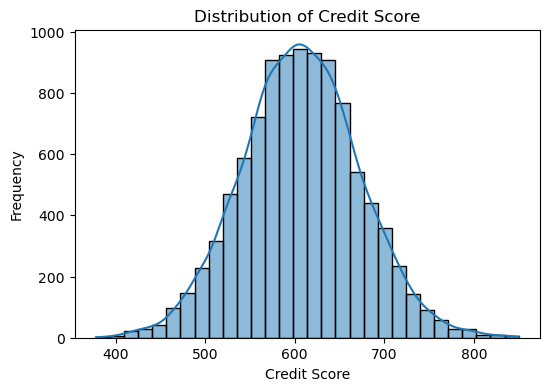

Skewness of credit_score: 0.06882566945614213


In [708]:
# Plot histogram for credit_score
plt.figure(figsize=(6, 4))
sns.histplot(data2['credit_score'], kde=True, bins=30)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Check skewness
credit_score_skewness = skew(data2['credit_score'])
print(f"Skewness of credit_score: {credit_score_skewness}")


In [314]:
X = data2.drop(['credit_score', 'creditworthiness_category'], axis=1)  
y = data2['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [710]:
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # removed 'auto' for compatibility
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [720]:
# best estimator to predict
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
print("\nModel Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Model Evaluation:
R2 Score: 0.7021495364327519
MAE: 28.995637
RMSE: 36.24937077624781


In [722]:
joblib.dump(best_rf, 'random_forest_credit_score_model.pkl')


['random_forest_credit_score_model.pkl']

# XGBoost Regressor for credit_score

In [19]:
# Encode the categorical columns BEFORE train-test split
categorical_cols = [
    'primary_crop',
    'education_category',
    'mobile_money_usage_frequency',
    'creditworthiness_category',
    'gender'
]

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col])
    encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")


In [21]:
X = data2.drop(['credit_score'], axis=1)  
y = data2['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Define the XGBoost regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb.predict(X_test)

print("Best Hyperparameters:", random_search.best_params_)
print("\nModel Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}

Model Evaluation:
R2 Score: 0.9441562294960022
MAE: 12.748765197753906
RMSE: 15.69598602103068


In [225]:
# Save the trained XGBoost model
joblib.dump(best_xgb, 'xgboost_credit_score_model.pkl')


['xgboost_credit_score_model.pkl']

# Gradient BoostingRegressor for credit_score

In [734]:
# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_gbr = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Predict
y_pred = best_gbr.predict(X_test)

# Evaluate
print("\nModel Evaluation (GradientBoostingRegressor):")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Save the model
joblib.dump(best_gbr, 'gradient_boosting_model.pkl')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}

Model Evaluation (GradientBoostingRegressor):
R2 Score: 0.7607041015073955
MAE: 26.003728769929186
RMSE: 32.49144001886063


['gradient_boosting_model.pkl']

#  Gradient Boosting Classification creditworthiness_category

In [756]:
X = data2.drop('creditworthiness_category', axis=1)

y = data2['creditworthiness_category']

In [765]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [767]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gb_clf = GradientBoostingClassifier(random_state=42)
gb_search = RandomizedSearchCV(gb_clf, gb_param_grid, n_iter=30, scoring='accuracy', cv=5, random_state=42, verbose=1, n_jobs=-1)
gb_search.fit(X_train, y_train)

# Best model
best_gb = gb_search.best_estimator_
gb_preds = best_gb.predict(X_test)

print("Best Parameters (Gradient Boosting):", gb_search.best_params_)
print("\nEvaluation:\n", classification_report(y_test, gb_preds, target_names=category_order))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (Gradient Boosting): {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}

Evaluation:
               precision    recall  f1-score   support

   Very Poor       1.00      1.00      1.00        49
        Poor       1.00      1.00      1.00       409
        Fair       1.00      1.00      1.00       702
        Good       1.00      1.00      1.00       434
   Very Good       1.00      1.00      1.00       248
   Excellent       1.00      1.00      1.00       158

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [794]:
# Save the model
joblib.dump(best_gb, 'gradient_boost_classifier.pkl')

['gradient_boost_classifier.pkl']

Summary

| Model                 | R² Score  | MAE        | RMSE      |
| --------------------- | --------- | ---------- | --------- |
| **Random Forest**     | 0.702     | 28.996     | 36.25     |
| **Gradient Boosting** | 0.761     | 26.004     | 32.49     |
| **XGBoost**           | **0.944** | **12.748** | **15.69** |
